In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
import numpy as np

train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [2]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_x = train_df.drop('label', axis = 1).values.reshape(-1,28,28)
train_y = train_df['label']
test_x = test_df.drop('label', axis = 1).values.reshape(-1,28,28)
test_y = test_df['label']

In [10]:
train_x.shape

(60000, 28, 28)

In [7]:
model = Sequential()

In [11]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [14]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(train_x.astype(np.float32), train_y.astype(np.float32), epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 73s 48ms/step - loss: 1.4184 - accuracy: 0.8418 - val_loss: 0.3728 - val_accuracy: 0.8718
Epoch 2/5
1500/1500 [==============================] - 74s 50ms/step - loss: 0.2969 - accuracy: 0.8938 - val_loss: 0.3652 - val_accuracy: 0.8714
Epoch 3/5
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2505 - accuracy: 0.9088 - val_loss: 0.3555 - val_accuracy: 0.8812
Epoch 4/5
1500/1500 [==============================] - 71s 47ms/step - loss: 0.2304 - accuracy: 0.9153 - val_loss: 0.3305 - val_accuracy: 0.8890
Epoch 5/5
1500/1500 [==============================] - 68s 45ms/step - loss: 0.2073 - accuracy: 0.9234 - val_loss: 0.3533 - val_accuracy: 0.8846


In [16]:
loss, acc = model.evaluate(test_x, test_y)

313/313 [==============================] - 7s 20ms/step - loss: 0.3340 - accuracy: 0.8860


In [17]:
print("Accuracy: ", acc)

Accuracy:  0.8859999775886536


In [21]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

In [19]:
prediction = model.predict(test_x[:1])

1/1 [==============================] - 0s 258ms/step


In [22]:
label = labels[np.argmax(prediction)]

t_shirt


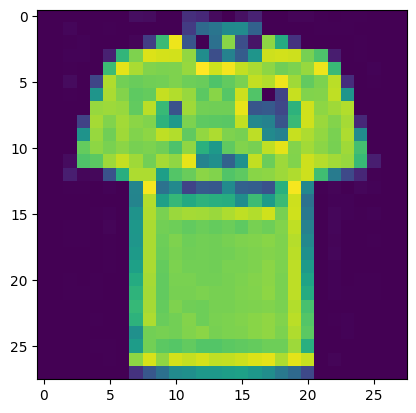

In [24]:
import matplotlib.pyplot as plt
print(label)
plt.imshow(test_x[:1][0])
plt.show()